<a href="https://colab.research.google.com/github/lokesh-8888/knn_dengue-ml-project/blob/main/KNN_Dengue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
from google.colab import files
uploaded = files.upload()  # Upload your dengue_data_encoded.csv file

# Read dataset
data = pd.read_csv("dengue_data_encoded.csv")

# Display basic information
print("✅ Dataset Loaded Successfully!")
print(data.shape)
data.head()

Saving dengue_data_encoded.csv to dengue_data_encoded (1).csv
✅ Dataset Loaded Successfully!
(15600, 20)


,Year,Month,Week,Season,City,Average Temperature (°C),Average Rainfall (mm),Average Humidity (%),Air Quality Index (AQI),Mosquito Density Index,Population Density (people per sq km),Dengue Cases Reported,Outbreak Risk Level,Latitude,Longitude,Month_Num,Month_Encoded,Season_Encoded,City_Encoded,Outbreak Risk Level_Encoded
0,2015.0,January,1.0,Winter,Delhi (NCT),15.59,3.72,67.535,192.4,0.084,11297.0,43.0,Low,28.7041,77.1025,1,4,3,7,1
1,2015.0,January,1.0,Winter,Mumbai,17.19,4.68,60.000,145.5,0.101,20400.0,7.0,Low,19.0760,72.8777,1,4,3,19,1
2,2015.0,January,1.0,Winter,Kolkata,18.77,26.51,69.980,128.5,0.235,24000.0,10.0,Low,22.5726,88.3639,1,4,3,14,1
3,2015.0,January,1.0,Winter,Chennai,18.05,0.97,61.710,92.6,0.000,26000.0,0.0,Low,13.0827,80.2707,1,4,3,5,1
4,2015.0,January,1.0,Winter,Bengaluru,15.28,9.09,57.360,127.7,0.104,11700.0,0.0,Low,12.9716,77.5946,1,4,3,2,1


In [3]:
# Check for missing values
print("Missing Values per Column:\n", data.isnull().sum())

# Display column data types
data.info()

# Check unique risk levels
print("\nUnique Risk Levels:", data["Outbreak Risk Level"].unique())
print("Encoded Risk Levels:", data["Outbreak Risk Level_Encoded"].unique())

Missing Values per Column:
 Year                                     0
Month                                    0
Week                                     0
Season                                   0
City                                     0
Average Temperature (°C)                 0
Average Rainfall (mm)                    0
Average Humidity (%)                     0
Air Quality Index (AQI)                  0
Mosquito Density Index                   0
Population Density (people per sq km)    0
Dengue Cases Reported                    0
Outbreak Risk Level                      0
Latitude                                 0
Longitude                                0
Month_Num                                0
Month_Encoded                            0
Season_Encoded                           0
City_Encoded                             0
Outbreak Risk Level_Encoded              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15600 entries, 0 to 15599
Data columns (total 20 

In [4]:
# Feature matrix (X) and target (y)
X = data[['Year', 'Week', 'Average Temperature (°C)', 'Average Rainfall (mm)',
          'Average Humidity (%)', 'Air Quality Index (AQI)', 'Mosquito Density Index',
          'Population Density (people per sq km)', 'Dengue Cases Reported',
          'Latitude', 'Longitude', 'Month_Num', 'Month_Encoded',
          'Season_Encoded', 'City_Encoded']]

y = data['Outbreak Risk Level_Encoded']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])

Training Samples: 11700
Testing Samples: 3900


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

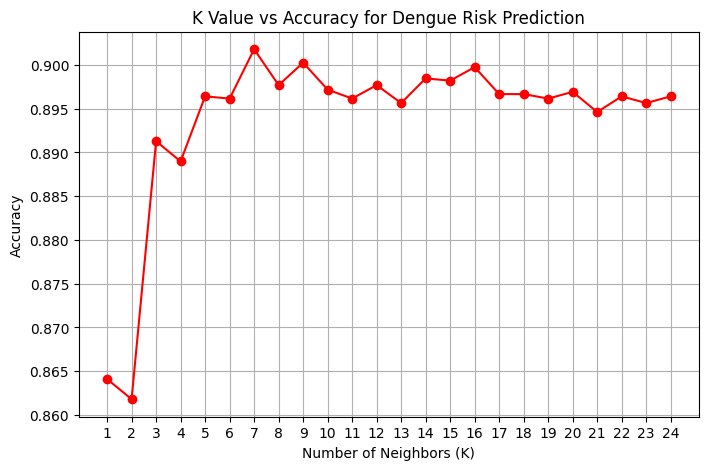

✅ Best K found: 7 with Accuracy = 0.902


In [7]:
k_values = range(1, 25)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='red')
plt.title('K Value vs Accuracy for Dengue Risk Prediction')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracies)]
print(f"✅ Best K found: {best_k} with Accuracy = {max(accuracies):.3f}")

k_values = range(1, 25)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='red')
plt.title('K Value vs Accuracy for Dengue Risk Prediction')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracies)]
print(f"✅ Best K found: {best_k} with Accuracy = {max(accuracies):.3f}")

In [8]:
# best_k = 7
knn = KNeighborsClassifier(n_neighbors=best_k, metric='minkowski', p=2)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print(f"Model trained with k = {best_k}")
print("Accuracy:", accuracy_score(y_test, y_pred))

Model trained with k = 7
Accuracy: 0.9017948717948718


Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1082
           1       0.96      0.92      0.94      2036
           2       0.78      0.81      0.79       782

    accuracy                           0.90      3900
   macro avg       0.88      0.89      0.88      3900
weighted avg       0.90      0.90      0.90      3900



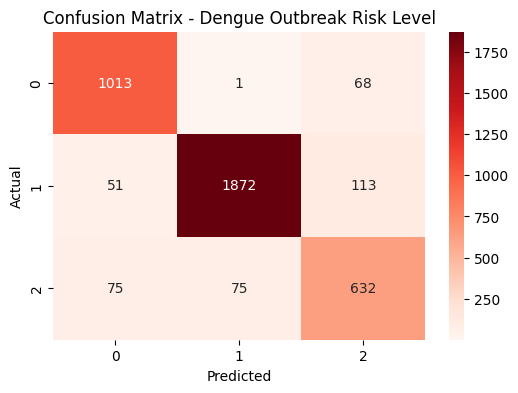

In [9]:
# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix - Dengue Outbreak Risk Level")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [10]:
# Example: Mumbai, Week 35, August
example_data = np.array([[2023, 35, 30.5, 250, 85, 120, 0.6, 20000, 120,
                           19.0760, 72.8777, 8, 8, 2, 19]])

example_scaled = scaler.transform(example_data)
predicted_risk = knn.predict(example_scaled)[0]
print(f"Predicted Outbreak Risk Level (Encoded): {predicted_risk}")

Predicted Outbreak Risk Level (Encoded): 0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


/tmp/ipython-input-971579699.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Reds_r')


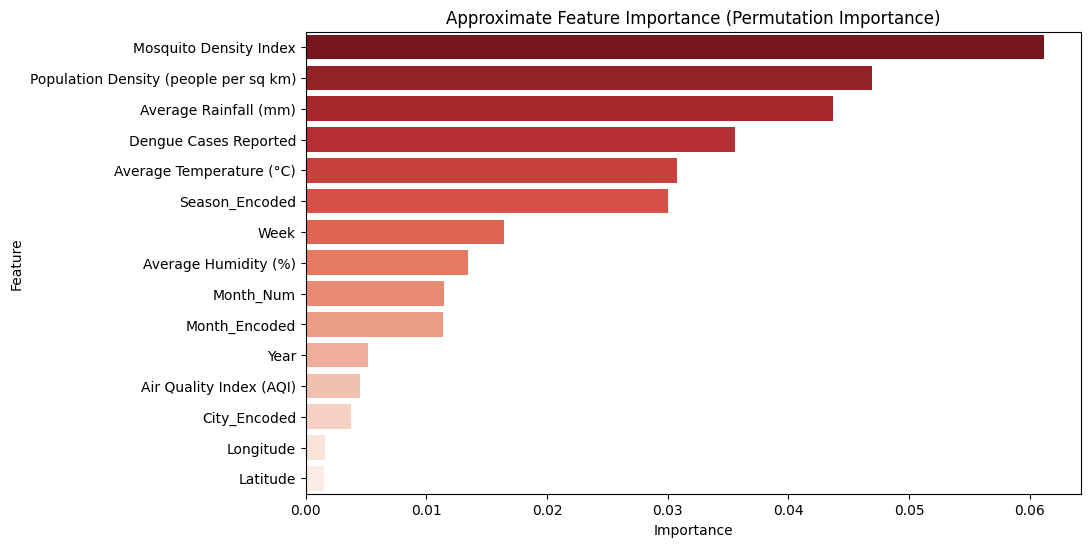

In [11]:
from sklearn.inspection import permutation_importance

result = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Reds_r')
plt.title('Approximate Feature Importance (Permutation Importance)')
plt.show()

In [12]:
import joblib

# Save the trained KNN model
joblib.dump(knn, "knn_dengue_model.pkl")

# Save the fitted scaler
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and Scaler saved successfully as 'knn_dengue_model.pkl' and 'scaler.pkl'")

✅ Model and Scaler saved successfully as 'knn_dengue_model.pkl' and 'scaler.pkl'


In [13]:
# Load saved files
loaded_model = joblib.load("knn_dengue_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

# Example test input
example_data = np.array([[2024, 30, 31.2, 180, 88, 115, 0.55, 22000, 100,
                          19.0760, 72.8777, 8, 8, 2, 19]])

example_scaled = loaded_scaler.transform(example_data)
predicted_risk = loaded_model.predict(example_scaled)[0]

print(f"✅ Loaded model works! Predicted Outbreak Risk Level (Encoded): {predicted_risk}")

✅ Loaded model works! Predicted Outbreak Risk Level (Encoded): 0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [14]:
model = joblib.load("knn_dengue_model.pkl")
scaler = joblib.load("scaler.pkl")

def predict_risk(input_data):
    scaled = scaler.transform([input_data])
    return model.predict(scaled)[0]

In [15]:
from google.colab import files

files.download("knn_dengue_model.pkl")
files.download("scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>